## ---------- PS1: how do you feel about these questions? ----------## Write a function `RemoveDigits` that will remove all digits (i.e., 0 through 9) from all elements in a *list of strings* Demonstrate that your approach is successful by passing a list of courses and other objects to your function## For example, RemoveDigits(["INFO 201", "CSE 142", "mps-803c"])## Write an if/else statement that checks to see if your list has any digits left. If it does have## digits, print "Oh no!", if it does not then print "Yay!"

## ---------- PS2: ----------
## What was the largest plane in terms of seats
## that flow to San Diego from NYC?  Tell us it's number of seats, manufacturer, and model.
## (5pt) What was the average flight duration to San Diego (arrival minus
## departure time)?  How long was the slowest as the fastest flight?
##
## Compare your results with those you find in flight schedules.  What
## do you find?

In [3]:
import pandas as pd
import numpy as np


## ---------- PS3: ----------

## Inference, MC

## Imagine that there is no real
## difference between fathers and sons.  Hence whatever we see in the
## actual data is just random sampling noise.  We would like to have a
## huge number of fathers and sons to test it, but unfortunately we do
## not have that.  So what we do instead: we create a huge number of
## fathers and sons, drawn from exactly the same distribution.
## Thereafter we can sample from our artificial population and see how
## often do we get as large a difference as we see in data.
## Well, as we deal with random numbers, there is no need to create a
## huge random population.  We can always just ask for more similar
## random numbers.

In [6]:
data = pd.read_csv('../assignments/nycflights13.csv.bz2', '\t')

In [7]:
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [8]:
data.shape

(336776, 19)

In [10]:
delays = data[['dep_delay', 'arr_delay']]

In [11]:
delays.mean()

dep_delay    12.639070
arr_delay     6.895377
dtype: float64

In [12]:
type(delays)

pandas.core.frame.DataFrame

In [13]:
delays = data[['dep_delay', 'arr_delay']].values
# get same data in matrix form instead of DataFrame
# doesn't make sense with different data types

In [15]:
type(delays)

numpy.ndarray

In [16]:
delays = data[['dep_delay', 'arr_delay']]

In [17]:
delays.shape

(336776, 2)

In [18]:
delays.dropna().shape

(327346, 2)

In [19]:
delays = delays.dropna().values

In [21]:
mu = delays.mean()

In [23]:
std = delays.std()

## Monte Carlo

If we create a random normal distribution, how likely is it that this difference in means will exist

In [24]:
N = 1000

In [35]:
R = 1000

In [28]:
da = np.random.normal(mu, std, size=N)

In [29]:
da[:20]

array([  44.31836222,  -45.90912551, -108.94472791,   91.36179132,
        -17.94140546,  -52.1019484 ,   -0.30704002,   27.61489427,
         49.68779227,  -16.88553143,  -62.87431274,  -39.12996675,
         43.85515083,   87.79119689,  -19.42969085,   19.0799031 ,
         41.60792138,  -58.55827082,   34.11594713,   -3.77846283])

In [30]:
dd = np.random.normal(mu, std, size=N)

In [31]:
dd.mean()

9.295977143721187

In [32]:
da.mean()

10.894832229868562

In [37]:
dif = np.empty(shape=R)
# start with random meaningless values which you will have to fill in
for l in range(R):
    da = np.random.normal(mu, std, size=N)
    dd = np.random.normal(mu, std, size=N)
    d = da.mean() - dd.mean()
    dif[l] = d
    # d.append(d) is very inefficient with large arrays -- computer has to do a lot of memory operations because the list changes its size

In [38]:
dif

array([ 3.11217307e+00, -2.25961661e+00, -1.92279457e+00, -7.02223008e-02,
        2.47063236e-02, -4.99531967e-01, -3.18483277e+00,  3.42288178e+00,
        5.68917279e-03,  5.14566350e-03,  8.11099407e-01, -1.45825046e+00,
       -1.40661127e+00, -9.97186605e-01,  4.31838210e-01,  3.85736479e-01,
        8.64863824e-01, -2.65837418e+00, -7.55277362e-01, -7.45689452e-02,
        2.16772549e+00, -2.09506613e+00, -1.61595257e-01, -9.88214598e-01,
        4.83180318e-01,  6.56069752e-01,  6.74215417e-01, -6.21538269e-01,
       -2.35393770e+00,  1.71385146e-01, -1.90014876e+00, -5.30726933e-01,
       -2.20451388e+00, -2.72929373e+00, -2.01657279e+00, -6.35300907e-01,
        3.11710876e+00,  1.38484967e+00, -2.65684829e+00,  2.99349001e+00,
       -3.16474570e-01,  3.85024178e-03, -7.84559945e-01, -1.30054009e+00,
        1.05720064e+00, -1.00321333e+00, -6.25100420e-01, -8.99400475e-01,
       -1.62511224e+00, -1.45752395e+00,  5.06914717e-01,  4.55843234e-02,
        2.29310191e+00,  

In [39]:
dif.mean()

0.023039341912940228

In [40]:
import matplotlib.pyplot as plt

(array([ 2.,  0.,  5.,  6., 12., 16., 23., 26., 38., 34., 50., 52., 87.,
        95., 91., 78., 59., 60., 57., 51., 37., 26., 26., 21., 17.,  7.,
        10.,  9.,  3.,  2.]),
 array([-5.40008987, -5.03643495, -4.67278003, -4.30912512, -3.9454702 ,
        -3.58181529, -3.21816037, -2.85450545, -2.49085054, -2.12719562,
        -1.76354071, -1.39988579, -1.03623087, -0.67257596, -0.30892104,
         0.05473387,  0.41838879,  0.78204371,  1.14569862,  1.50935354,
         1.87300846,  2.23666337,  2.60031829,  2.9639732 ,  3.32762812,
         3.69128304,  4.05493795,  4.41859287,  4.78224778,  5.1459027 ,
         5.50955762]),
 <a list of 30 Patch objects>)

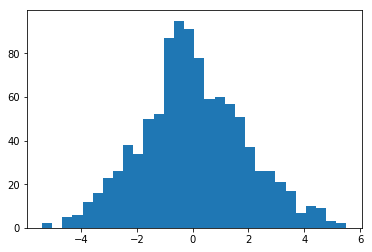

In [41]:
plt.hist(dif, bins=30)

In [42]:
np.percentile(dif, 2.5)

-3.532190169389417

In [43]:
# 2.5% of simulations are smaller than -3.5

In [44]:
np.percentile(dif, 97.5)

3.99066805290734

In [45]:
# 95% CI: [-3.5, 3.99]

In [47]:
np.percentile(dif, [2.5, 97.5])

array([-3.53219017,  3.99066805])

In [48]:
delays.shape

(327346, 2)

In [49]:
N = 327346
# we must have the correct number since the mean difference reduces the larger the sample size

In [50]:
dif = np.empty(R)
for l in range(R):
    da = np.random.normal(mu, std, size = N)
    dd = np.random.normal(mu, std, size = N)
    d = da.mean() - dd.mean()
    dif[l] = d


(array([ 2.,  3.,  6., 10., 10., 25., 26., 41., 38., 62., 67., 74., 97.,
        79., 88., 77., 69., 52., 49., 36., 33., 22., 15.,  6.,  7.,  3.,
         2.,  0.,  0.,  1.]),
 array([-0.31032494, -0.28743089, -0.26453684, -0.2416428 , -0.21874875,
        -0.19585471, -0.17296066, -0.15006661, -0.12717257, -0.10427852,
        -0.08138448, -0.05849043, -0.03559638, -0.01270234,  0.01019171,
         0.03308576,  0.0559798 ,  0.07887385,  0.10176789,  0.12466194,
         0.14755599,  0.17045003,  0.19334408,  0.21623813,  0.23913217,
         0.26202622,  0.28492026,  0.30781431,  0.33070836,  0.3536024 ,
         0.37649645]),
 <a list of 30 Patch objects>)

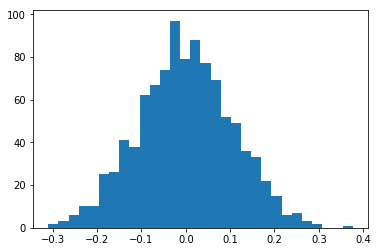

In [51]:
plt.hist(dif, bins=30)

In [52]:
np.percentile(dif, [2.5, 97.5])

array([-0.20599056,  0.19979423])

In [54]:
# 6 minutes is way larger than CI
# Hypothesis: dep delay same as arr delay is highly unlikely
# currently the same as saying: no way it can be by chance that the delay is 6 minutes

## T-test

In [56]:
ma = data.arr_delay.mean()
ma

6.89537675731489

In [58]:
md = data.dep_delay.mean()
md

12.639070257304708

In [60]:
dif = ma - md
dif

-5.743693499989818

In [61]:
# t = (ma - md)/(std of (ma - md))
# t = effect size/standard deviation

In [62]:
stddiff = np.sqrt(np.var(data.dep_delay)/len(data) + np.var(data.arr_delay)/len(data))

In [63]:
stddiff

0.1035192201369706

In [64]:
t = (ma - md)/stddiff

In [65]:
t

-55.48431964991716

In [66]:
# t = -55, df = 300000 (num observations)
# google t-test table
# top row shows how likely difference is due to chance alone -- becaause t value is 55, it is essentially impossible that it is from chance alone

In [69]:
text = pd.read_csv('../assignments/texts-test.csv.bz2', '\t')

In [70]:
text

,name,size,lines,pagenr,text
0,laozi,1,1,1,"Knowing others is, knowing yourself is"
1,laozi,1,1,2,Mastering others is strength. Mastering yourse...
2,so,1,1,1,I tried using L.index() the mastering the
3,so,1,1,2,I tried running loop L using L.index(R)


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vr = CountVectorizer()

In [73]:
vr.fit(text.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [77]:
X = vr.transform(text.text).toarray()

In [76]:
vr.get_feature_names()

['index',
 'is',
 'knowing',
 'loop',
 'mastering',
 'others',
 'running',
 'strength',
 'the',
 'tried',
 'using',
 'yourself']

In [78]:
df = pd.DataFrame(X, columns=vr.get_feature_names())

In [79]:
df

,index,is,knowing,loop,mastering,others,running,strength,the,tried,using,yourself
0,0,2,2,0,0,1,0,0,0,0,0,1
1,0,2,0,1,2,1,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,2,1,1,0
3,1,0,0,1,0,0,1,0,0,1,1,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, text.name.values)

In [82]:
Xtrain

array([[1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0],
       [0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1],
       [0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

In [84]:
Xvalid

array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]])

In [85]:
ytrain

array(['so', 'laozi', 'laozi'], dtype=object)

In [86]:
yvalid

array(['so'], dtype=object)